In [1]:
from models import *
from data_prep import *
from divide import *

In [20]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, False, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [21]:
# study, best_model, cv_score, test_score = optimize_model('LGBM', train, features, trials=10)

In [2]:
params = {'n_estimators': 140, 'learning_rate': 0.24668625689002896, 'num_leaves': 759, 'max_depth': 26, 'min_data_in_leaf': 18, 'bagging_freq': 4, 'lambda_l1': 2.6409376990064573, 'lambda_l2': 1.878731710287742, 'reg_sqrt': False, 'max_bin': 2999, 'verbose': -1}

In [23]:
X = train[features]
y = train['kWh']

lgbm_model = lgb.LGBMRegressor(**params)
lgbm_model.fit(X, y)

LGBMRegressor(bagging_freq=4, lambda_l1=2.6409376990064573,
              lambda_l2=1.878731710287742, learning_rate=0.24668625689002896,
              max_bin=2999, max_depth=26, min_data_in_leaf=18, n_estimators=140,
              num_leaves=759, reg_sqrt=False, verbose=-1)

In [24]:
valid_preds = lgbm_model.predict(val[features])
test_preds = lgbm_model.predict(test[features])
print(f"Validation: {mape(val['kWh'], valid_preds)} \n"
      f"Test: {mape(test['kWh'], test_preds)}")

Validation: 1.9143762497702217 
Test: 2.499114631514035


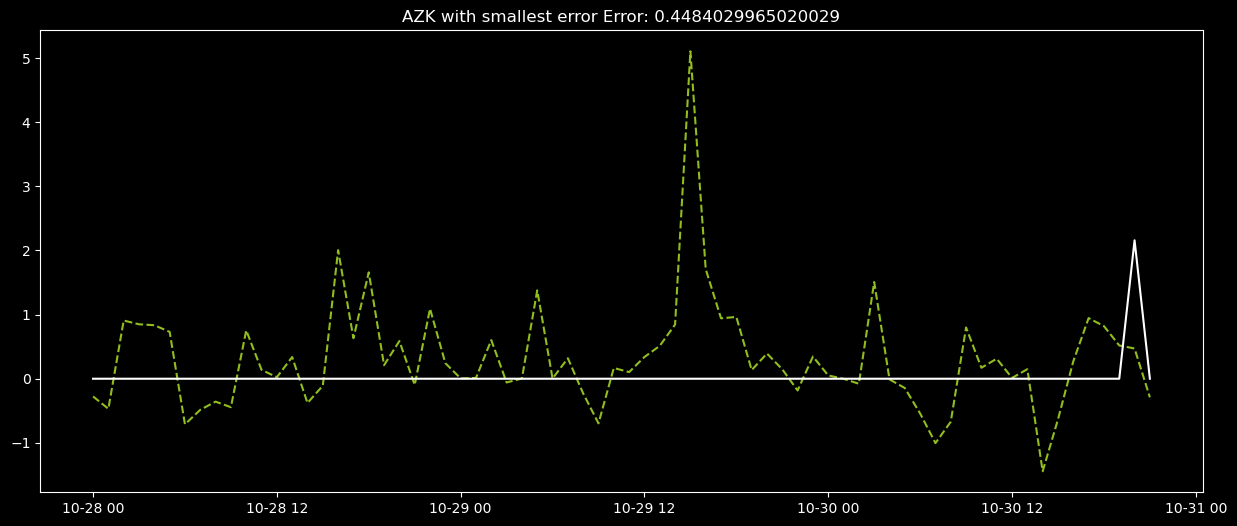

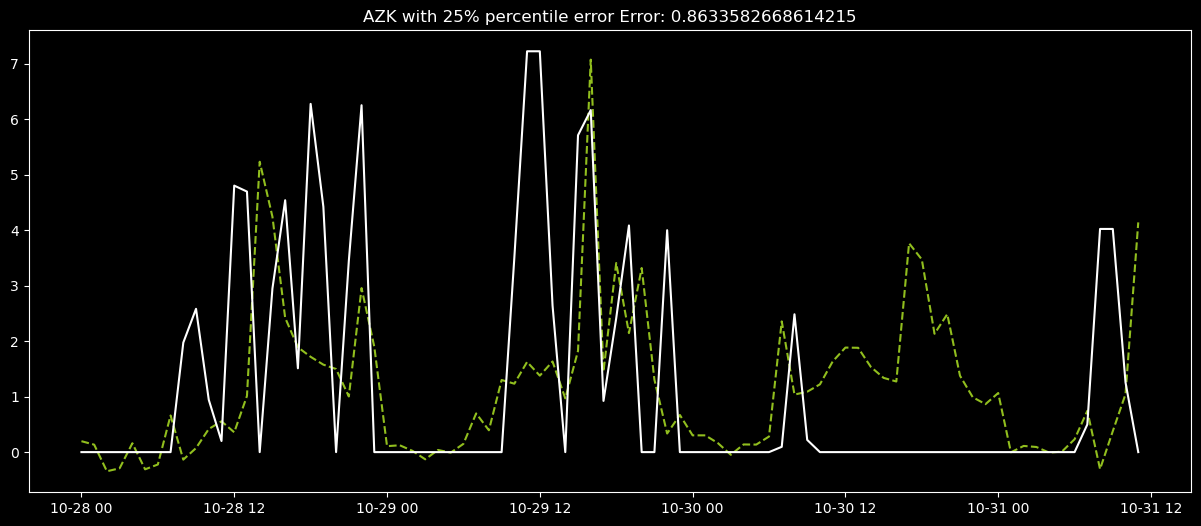

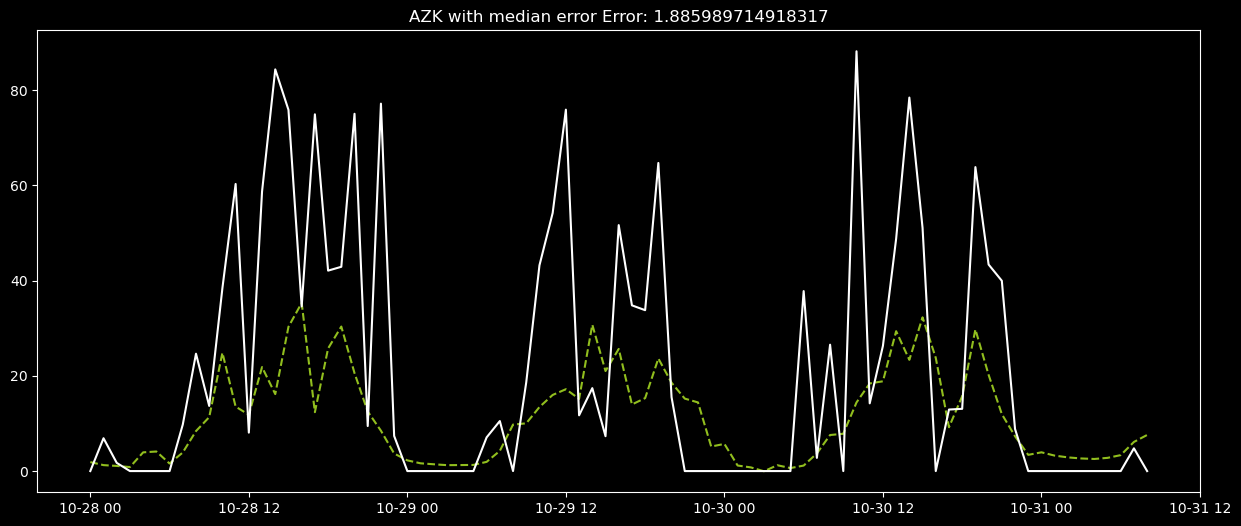

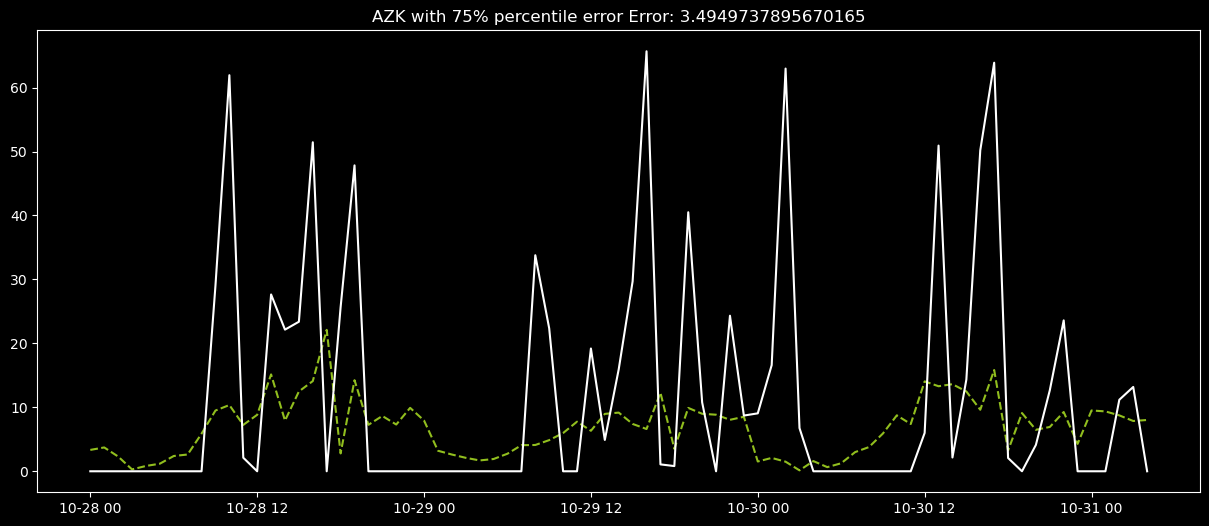

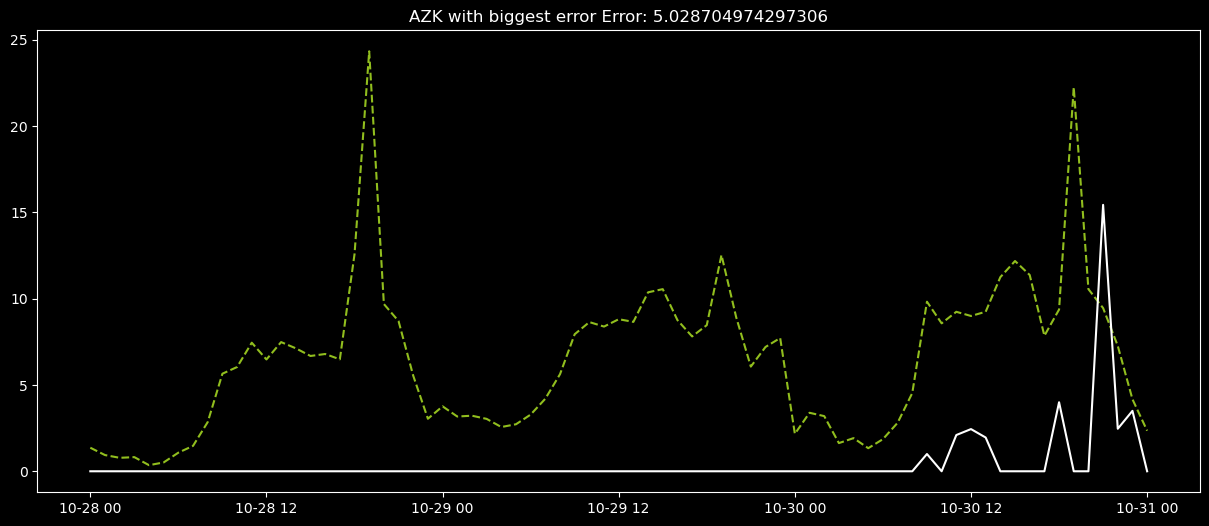

In [25]:
vizualize_percentiles(df, test, val, lgbm_model, features)

In [3]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, True, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [4]:
X = train[features]
y = train['kWh']

lgbm_model = lgb.LGBMRegressor(**params)
lgbm_model.fit(X, y)

LGBMRegressor(bagging_freq=4, lambda_l1=2.6409376990064573,
              lambda_l2=1.878731710287742, learning_rate=0.24668625689002896,
              max_bin=2999, max_depth=26, min_data_in_leaf=18, n_estimators=140,
              num_leaves=759, reg_sqrt=False, verbose=-1)

In [5]:
valid_preds = lgbm_model.predict(val[features])
test_preds = lgbm_model.predict(test[features])
print(f"Validation: {smape(val['kWh'], valid_preds)} \n"
      f"Test: {smape(test['kWh'], test_preds)}")

Validation: 168.10175651427718 
Test: 167.41093043358768


In [10]:
valid_preds = lgbm_model.predict(val[features])
test_preds = lgbm_model.predict(test[features])
print(f"Validation: {smape_metric(val['kWh'], valid_preds)} \n"
      f"Test: {smape_metric(test['kWh'], test_preds)}")

Validation: 1.0934216398642904e+16 
Test: 8749769332031269.0


In [ ]:
vizualize_percentiles(df, test, val, lgbm_model, features)